In [1]:
# Sync with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import zipfile

In [3]:
# unzip the archive from my drive
local_zip = '/content/drive/MyDrive/wildfire_dataset/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data/data/')
zip_ref.close()

# Removing corrupted images

In [4]:
from os import listdir
from PIL import Image

In [5]:
# when training the model there was an error caused by the training dataset
# this file was found as corrupted, using the cell from below
data_dir = '/content/sample_data/data'
file = data_dir + '/train/nowildfire/-114.152378,51.027198.jpg'
os.remove(file)

In [6]:
# this cell is used to find corrupted files in the test dataset

test_data_dir = data_dir + '/test' # this is the path in which we must search
bad_img_list = [] # we initialize the list where corrupted images will be stored
for klass in os.listdir(test_data_dir): # class will be a list: [wildfire, nowildfire]
  for image in os.listdir(os.path.join(test_data_dir, klass)): # image will be a list of all images name in the current class
    fpath = os.path.join(test_data_dir, klass, image) # path to the current image
    try:
      index=image.rfind('.') # find the rightmost . in f
      ext=image[index+1:].lower() # get the files extension and convert to lower case
      good_ext=['jpg', 'jpeg', 'bmp', 'png']# list of allowable extension for image_dataset_from_directory
      if ext not in good_ext:
        raise ValueError('image had improper extension') # create an exception so the file will be appended to bad_img_list
      with open(fpath, 'rb') as image:
        check_chars = image.read()[-2:]
      if check_chars != b'\xff\xd9':  # incomplete image test
        print(fpath, 'Not complete image')
    except:
      print('no corrupted image in the dataset')

/content/sample_data/data/test/wildfire/-73.15884,46.38819.jpg Not complete image


In [7]:
os.remove('/content/sample_data/data/test/wildfire/-73.15884,46.38819.jpg')

# Loading the data

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
# the data used to train this model is already split into train, val and test and shuffled
# this function will shuffle it one more time just to be sure
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/sample_data/data/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (350, 350))
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/sample_data/data/valid',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(350, 350))

Found 30249 files belonging to 2 classes.
Found 6300 files belonging to 2 classes.


In [10]:
# we do the same for the test data
test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/sample_data/data/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(350, 350))

Found 6299 files belonging to 2 classes.


# Inspecting the data

In [11]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [12]:
img = cv2.imread(os.path.join('/content/sample_data/data/train', 'wildfire', '-57.11902,51.47242.jpg'))
print(img)
type(img)
#numpy array

[[[ 38  69  36]
  [ 33  64  31]
  [ 22  53  24]
  ...
  [ 13  26   4]
  [ 13  26   4]
  [ 13  26   4]]

 [[ 16  47  14]
  [ 15  46  15]
  [ 11  42  13]
  ...
  [ 13  26   4]
  [ 13  26   4]
  [ 13  26   4]]

 [[ 10  42  11]
  [ 21  53  22]
  [ 28  59  30]
  ...
  [ 13  26   4]
  [ 13  26   4]
  [ 13  26   4]]

 ...

 [[ 96 127 142]
  [ 99 130 145]
  [ 89 120 135]
  ...
  [ 13  42  17]
  [ 16  45  20]
  [ 24  53  28]]

 [[ 90 121 136]
  [ 97 128 143]
  [ 89 120 135]
  ...
  [ 20  49  24]
  [ 22  51  26]
  [ 28  57  32]]

 [[ 75 106 121]
  [100 131 146]
  [103 134 149]
  ...
  [ 30  59  34]
  [ 42  71  46]
  [ 51  80  55]]]


numpy.ndarray

In [13]:
img.shape
#height, width, channels

(350, 350, 3)

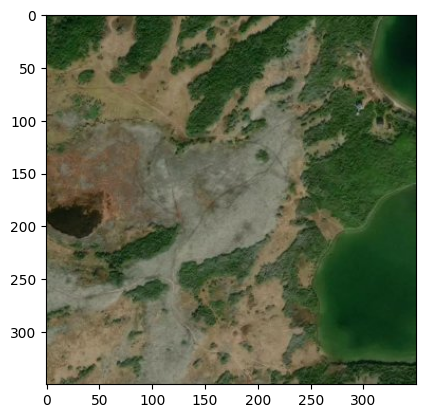

In [14]:
# open cv reads in BGR
# we convert to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
train_iterator = train_dataset.as_numpy_iterator()
train_batch = train_iterator.next()

In [16]:
len(train_batch)

2

In [17]:
#batch size, height, width, no. channels of the images
train_batch[0].shape

(32, 350, 350, 3)

In [18]:
#images
train_batch[0]

array([[[[ 92., 111.,  91.],
         [ 77.,  96.,  74.],
         [ 86., 101.,  80.],
         ...,
         [ 17.,  34.,  16.],
         [ 33.,  50.,  31.],
         [ 57.,  74.,  55.]],

        [[ 90., 109.,  89.],
         [ 70.,  87.,  68.],
         [ 72.,  87.,  66.],
         ...,
         [ 49.,  66.,  48.],
         [ 63.,  80.,  61.],
         [ 37.,  54.,  35.]],

        [[ 91., 108.,  89.],
         [ 73.,  90.,  71.],
         [ 68.,  83.,  62.],
         ...,
         [ 18.,  35.,  17.],
         [ 40.,  57.,  39.],
         [ 46.,  63.,  45.]],

        ...,

        [[ 65.,  80.,  59.],
         [ 97., 112.,  91.],
         [145., 160., 141.],
         ...,
         [ 12.,  27.,   8.],
         [ 50.,  65.,  46.],
         [ 57.,  72.,  53.]],

        [[ 35.,  50.,  29.],
         [ 61.,  76.,  55.],
         [130., 145., 124.],
         ...,
         [ 14.,  29.,  10.],
         [ 41.,  56.,  37.],
         [ 88., 103.,  84.]],

        [[ 42.,  57.,  36.],
       

In [19]:
#labels
train_batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int32)

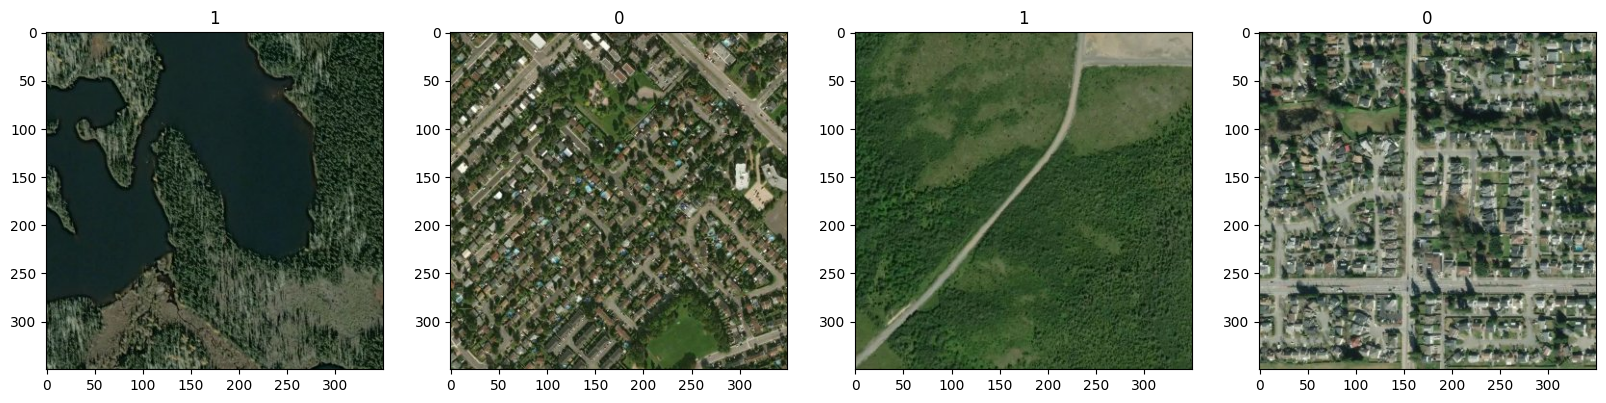

In [20]:
#this is a plot for showing which class is assigned to which image
#label 0 is assigned to nowildfire
#which means that label 1 is assigned to wildfire
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for i, img in enumerate(train_batch[0][:4]):
  ax[i].imshow(img.astype(int))
  ax[i].title.set_text(train_batch[1][i])

# Build the CNN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Rescaling

In [57]:
model = Sequential()

In [58]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal', input_shape = (350, 350, 3)),
  tf.keras.layers.RandomRotation(0.2),
])

In [59]:
# as an input layer i added a layer of rescaling, which rescales the intensities
# of the images form 0-255 to 0.0-1.0
model.add(data_augmentation)
model.add(Rescaling(scale=1./255, offset=0.0))

# 16 filters, kernel is 3 x 3 and it moves pixel by pixel
model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

# 32 filters, kernel is 3 x 3 and it moves pixel by pixel
model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

# 16 filters, kernel is 3 x 3 and it moves pixel by pixel
model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(350, activation = 'relu'))
# this function will classify values over 0.5 as class 1 and below 0.5 as class 0
model.add(Dense(1, activation = 'sigmoid'))

In [40]:
model = tf.keras.Model(inputs)

In [60]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [61]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 350, 350, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 350, 350, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 348, 348, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 174, 174, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 172, 172, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 86, 86, 32)       0         
 g2D)                                                

# Train

In [63]:
hist = model.fit(train_dataset, epochs = 3, validation_data = validation_dataset)

Epoch 1/3
946/946 [==============================] - 126s 117ms/step - loss: 0.2302 - accuracy: 0.9052 - val_loss: 0.2023 - val_accuracy: 0.9259
Epoch 2/3
946/946 [==============================] - 103s 108ms/step - loss: 0.1749 - accuracy: 0.9361 - val_loss: 0.1387 - val_accuracy: 0.9502
Epoch 3/3
946/946 [==============================] - 105s 111ms/step - loss: 0.1547 - accuracy: 0.9426 - val_loss: 0.1195 - val_accuracy: 0.9543


# Plotting the results

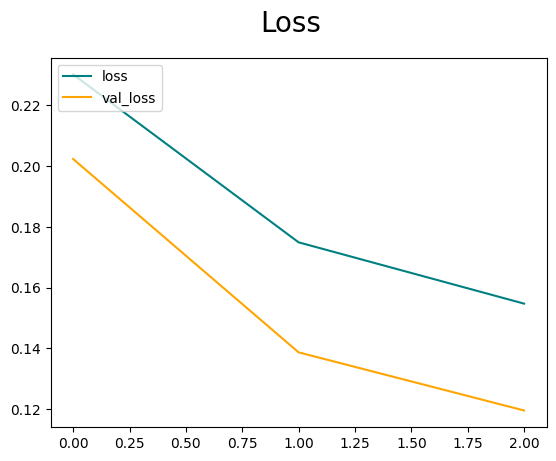

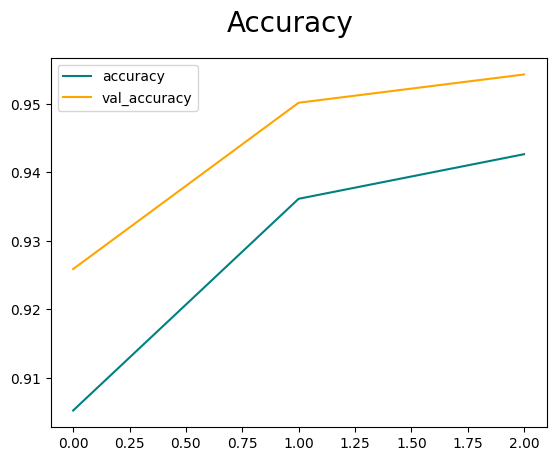

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate on test data

In [65]:
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

In [66]:
precision = Precision()
recall = Recall()
binaryAccuracy = BinaryAccuracy()

In [67]:
for batch in test_dataset.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  binaryAccuracy.update_state(y, yhat)

1/1 [==============================] - 1s 552ms/step


In [68]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, BinaryAccuracy:{binaryAccuracy.result().numpy()}')

Precision:0.9637143015861511, Recall:0.9695314764976501, BinaryAccuracy:0.9630100131034851


# Saving the model

In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save('content/sample_data/models/wildfire_prediction_model.h5')

### A function which predicts a given image

In [71]:
import numpy as np

In [72]:
def predict(model, path):
  img = cv2.imread(path)
  if img.shape[0] != 350 or img.shape[1] != 350:
    img = tf.image.resize(img, (350, 350))
  yhat = model.predict(np.expand_dims(img, 0))
  return yhat

### Images that the model does not predict

In [73]:
yhat = predict(model, '/content/sample_data/data/test/wildfire/-59.03238,51.85132.jpg')
print(yhat)

1/1 [==============================] - 0s 344ms/step
[[0.01970896]]


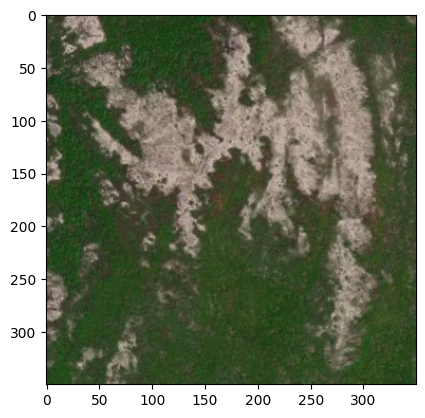

In [74]:
img = cv2.imread('/content/sample_data/data/test/wildfire/-59.03238,51.85132.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [75]:
yhat = predict(model, '/content/sample_data/data/test/wildfire/-60.6867,50.26079.jpg')
print(yhat)

1/1 [==============================] - 0s 22ms/step
[[0.02545497]]


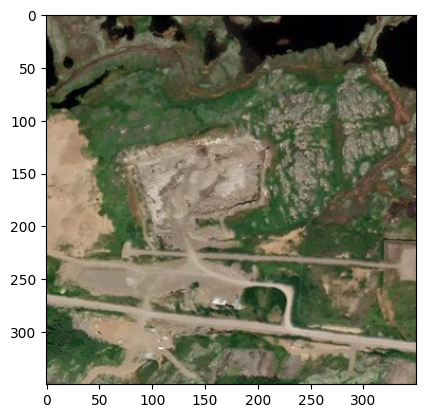

In [76]:
img = cv2.imread('/content/sample_data/data/test/wildfire/-60.6867,50.26079.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Confusion matrix

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [78]:
batch = test_dataset.as_numpy_iterator().next()
actual = []
predicted  = []
for image, label in zip(batch[0], batch[1]):
    actual.append(label)
    yhat = model.predict(np.expand_dims(image, 0))
    predicted.append(int(np.round(yhat[0][0])))
print(actual)
print(predicted)

1/1 [==============================] - 0s 19ms/step
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]


In [81]:
cm = confusion_matrix(actual, predicted)

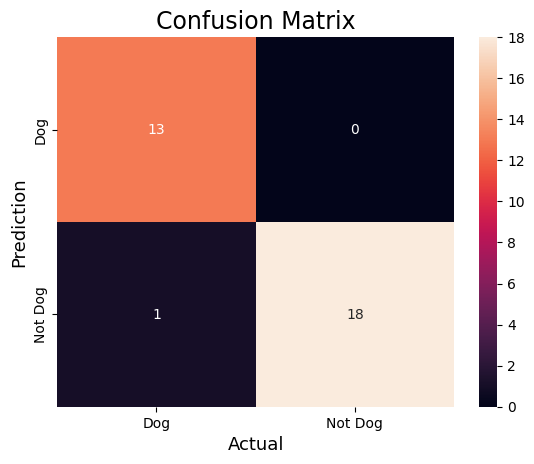

In [82]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Visualization of how the model learns from images

### Feature map visualization

In [118]:
# get the layer list of the model
layer_outputs = [layer.output for layer in model.layers[1:]]
layer_outputs

[<KerasTensor: shape=(None, 350, 350, 3) dtype=float32 (created by layer 'rescaling_7')>,
 <KerasTensor: shape=(None, 348, 348, 16) dtype=float32 (created by layer 'conv2d_12')>,
 <KerasTensor: shape=(None, 174, 174, 16) dtype=float32 (created by layer 'max_pooling2d_12')>,
 <KerasTensor: shape=(None, 172, 172, 32) dtype=float32 (created by layer 'conv2d_13')>,
 <KerasTensor: shape=(None, 86, 86, 32) dtype=float32 (created by layer 'max_pooling2d_13')>,
 <KerasTensor: shape=(None, 84, 84, 16) dtype=float32 (created by layer 'conv2d_14')>,
 <KerasTensor: shape=(None, 42, 42, 16) dtype=float32 (created by layer 'max_pooling2d_14')>,
 <KerasTensor: shape=(None, 28224) dtype=float32 (created by layer 'flatten_4')>,
 <KerasTensor: shape=(None, 350) dtype=float32 (created by layer 'dense_8')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_9')>]

In [119]:
# create a visualization model
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)

In [120]:
# load image for prediction
img = cv2.imread(os.path.join('/content/sample_data/data/test', 'wildfire', '-64.62835,48.91427.jpg'))

In [121]:
img.shape

(350, 350, 3)

In [123]:
# the input layer must be fed a batch
# turn the imagage into a batch of one image so we can use the predict method
x = np.expand_dims(img, 0)
x.shape

(1, 350, 350, 3)

In [124]:
feature_maps = visualization_model.predict(x)
len(feature_maps)

1/1 [==============================] - 0s 142ms/step


10

In [125]:
# names of available layers in the model
layer_names = [layer.name for layer in model.layers]
layer_names

['sequential_12',
 'rescaling_7',
 'conv2d_12',
 'max_pooling2d_12',
 'conv2d_13',
 'max_pooling2d_13',
 'conv2d_14',
 'max_pooling2d_14',
 'flatten_4',
 'dense_8',
 'dense_9']

In [126]:
# plotting the graph
for layer_names, feature_maps in zip(layer_names, feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4:
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x = x - x.mean()
      x = x / x.std()
      x = x * 64
      x = x + 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20./channels
    plt.figure(figsize = (scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

Output hidden; open in https://colab.research.google.com to view.

### Grad-CAM class activation visualisation

In [101]:
from tensorflow import keras

In [102]:
# Display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

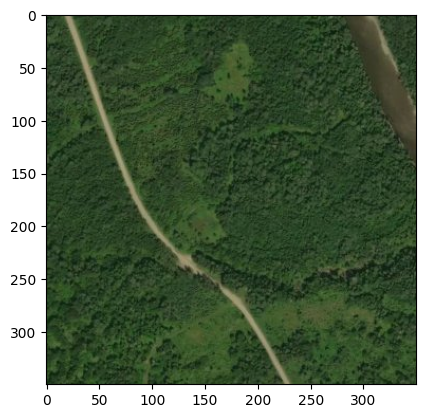

In [103]:
img = cv2.imread(os.path.join('/content/sample_data/data/test', 'wildfire', '-64.62835,48.91427.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [110]:
test_model = model

preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = 'conv2d_14'

In [111]:
def get_img_array(img):
    # We add a dimension to transform our array into a "batch"
    # of size (1, 350, 350, 3)
    array = np.expand_dims(img, axis=0)
    return array

In [112]:
array = get_img_array(img)
array.shape

(1, 350, 350, 3)

In [113]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 19ms/step
[[0.98502296]]


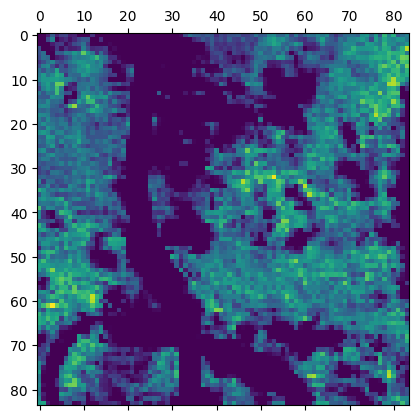

In [114]:
# Remove last layer's sigmoid
test_model.layers[-1].activation = None

# Print what the top predicted class is
prediction = test_model.predict(array)
print(prediction)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(array, test_model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [115]:
from IPython.display import Image, display

In [116]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # convert img to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

<ipython-input-116-9dcc5114091c>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


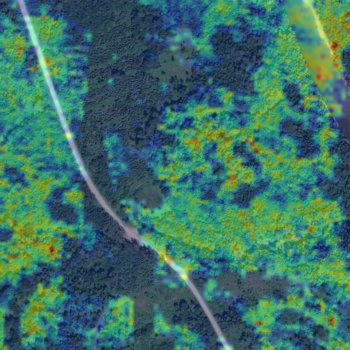

In [117]:
save_and_display_gradcam(img, heatmap)